Final Exam- Clustering
Clustering: Cluster the (y=yes).

#Context
Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing, and digital marketing.

Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.

The data is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe to a term deposit (variable y).

Content
The data is related to the direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed by the customer or not. The data folder contains two datasets:-


Detailed Column Descriptions
bank client data:

1 - age (numeric)  
2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",  
"blue-collar","self-employed","retired","technician","services")  
3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)  
4 - education (categorical: "unknown","secondary","primary","tertiary")    
5 - default: has credit in default? (binary: "yes","no")
6 - balance: average yearly balance, in euros (numeric)  
7 - housing: has housing loan? (binary: "yes","no")  
8 - loan: has personal loan? (binary: "yes","no")  

related with the last contact of the current campaign:   

9 - contact: contact communication type (categorical: "unknown","telephone","cellular")
10 - day: last contact day of the month (numeric)
11 - month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")
12 - duration: last contact duration, in seconds (numeric)  
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)  
15 - previous: number of contacts performed before this campaign and for this client (numeric)  
16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")  

Output variable (desired target):
17 - y - has the client subscribed a term deposit? (binary: "yes","no")

Missing Attribute Values: None


In [1]:
import warnings 
warnings.simplefilter("ignore")  

import pandas as pd

data0=pd.read_excel('BankTrain.xlsx')

data0.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [2]:
data0.isnull().sum()  # get the number of missing data points per column

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [3]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
data0.shape

(45211, 17)

In [5]:
data0.head().transpose() 

,0,1,2,3,4
age,58,44,33,47,33
job,management,technician,entrepreneur,blue-collar,unknown
marital,married,single,married,married,single
education,tertiary,secondary,secondary,unknown,unknown
default,no,no,no,no,no
balance,2143,29,2,1506,1
housing,yes,yes,yes,yes,no
loan,no,no,yes,no,no
contact,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5


In [6]:
data0.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
cat_vars = ['poutcome', 'y', 'contact', 'job', 'default','month', 'marital','housing', 'loan']

In [8]:
data0.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [9]:
data0['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [10]:
data0['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [11]:
data0['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [12]:
data0[['marital', 'y']].value_counts()

marital   y  
married   no     24459
single    no     10878
divorced  no      4585
married   yes     2755
single    yes     1912
divorced  yes      622
dtype: int64

In [13]:
cat_cols = data0.select_dtypes(include=object).columns.tolist()
cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [14]:
a=   (pd.DataFrame(
        data0[cat_cols]
        .melt(var_name='column', value_name='value')
        .value_counts(normalize=True)) # percent
    .rename(columns={0: 'counts'})
    .sort_values(by=['column', 'counts']))

b=   (pd.DataFrame(
        data0[cat_cols]
        .melt(var_name='column', value_name='value')
        .value_counts(normalize=False)) # actual count
    .rename(columns={0: 'counts'})
    .sort_values(by=['column', 'counts']))
b

counts
column    value                
contact   telephone        2906
          unknown         13020
          cellular        29285
default   yes               815
          no              44396
education unknown          1857
          primary          6851
          tertiary        13301
          secondary       23202
housing   no              20081
          yes             25130
job       unknown           288
          student           938
          housemaid        1240
          unemployed       1303
          entrepreneur     1487
          self-employed    1579
          retired          2264
          services         4154
          admin.           5171
          technician       7597
          management       9458
          blue-collar      9732
loan      yes              7244
          no              37967
marital   divorced         5207
          single          12790
          married         27214
month     dec               214
          mar               477
          sep               579
          oct               738
          jan              1403
          feb              2649
          apr              2932
          nov              3970
          jun              5341
          aug              6247
          jul              6895
          may             13766
poutcome  success          1511
          other            1840
          failure          4901
          unknown         36959
y         yes              5289
          no              39922

## Clustering
Instead of clustering the entire dataset, we will only cluster the Defaulters (y=1). Because the nodes of the classification tree built can be treated as the clusters for the entire data. Clustering just Defaulters give us more insights other models are not able to provide. We can look into Defaulters to see if there are different types (clusters) of defaulters. 

For normalization of numeric variables ("age", "balance", "duration", "campaign", "day"), we will use MinMaxScaler.  
For non-numeric barables we will create dummy variables with weigts. example: education = 'secondary', 'tertiary', 'unknown' ; If row contain secondary it sets = 0.33 (1/3) 

In [15]:
data0.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [16]:
data1 = data0.copy()
data1=data1.fillna(data1.mean()) #Replace missing values of numeric attributes with the mean of the attribute

data1=data1.fillna('Missing') #Replace missing values of categorical attributes with string 'Missing'
data2 = data1[data1['y'] == 'yes'] #keep a copy of the data for clustering because it will be further processed for clustering. 
data2=data2.drop(["y", "pdays", "previous", "poutcome", "contact"], axis = 1)
data2.to_excel('BankCluster.xlsx', index=None)

In [17]:
data_orig=pd.read_excel('BankCluster.xlsx')
data_clu = data_orig.copy()
data_clu.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign
0,59,admin.,married,secondary,no,2343,yes,no,5,may,1042,1
1,56,admin.,married,secondary,no,45,no,no,5,may,1467,1
2,41,technician,married,secondary,no,1270,yes,no,5,may,1389,1
3,55,services,married,secondary,no,2476,yes,no,5,may,579,1
4,54,admin.,married,tertiary,no,184,no,no,5,may,673,2


In [18]:
data_clu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5289 entries, 0 to 5288
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        5289 non-null   int64 
 1   job        5289 non-null   object
 2   marital    5289 non-null   object
 3   education  5289 non-null   object
 4   default    5289 non-null   object
 5   balance    5289 non-null   int64 
 6   housing    5289 non-null   object
 7   loan       5289 non-null   object
 8   day        5289 non-null   int64 
 9   month      5289 non-null   object
 10  duration   5289 non-null   int64 
 11  campaign   5289 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 496.0+ KB


In [19]:
from sklearn.preprocessing import MinMaxScaler 

scaler1=MinMaxScaler()
intC = ["age", "balance", "duration", "campaign", "day"]

scaler1.fit(data_clu[intC])

data_clu[intC]=scaler1.transform(data_clu[intC]) 

data_clu.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign
0,0.532468,admin.,married,secondary,no,0.064098,yes,no,0.133333,may,0.266977,0.000000
1,0.493506,admin.,married,secondary,no,0.036826,no,no,0.133333,may,0.376711,0.000000
2,0.298701,technician,married,secondary,no,0.051364,yes,no,0.133333,may,0.356571,0.000000
3,0.480519,services,married,secondary,no,0.065676,yes,no,0.133333,may,0.147431,0.000000
4,0.467532,admin.,married,tertiary,no,0.038475,no,no,0.133333,may,0.171702,0.032258


#Give less weights to those attributes derived from nominal attributes to make their differences comparable with other numeric attributes.
#This is done in a very ad-hoc manner just for demonstration purpose. 

In [20]:
from final_exam_functions import cat_to_dummy_wt_adjustment

cat_cols = data_clu.select_dtypes(include=object).columns.tolist()

data_clu=cat_to_dummy_wt_adjustment(data_orig, data_clu, cat_cols) #Convert categorical values to 0/1. Used for classification. This also does weight adjustment  

data_clu.head().transpose()

,0,1,2,3,4
age,0.532468,0.493506,0.298701,0.480519,0.467532
balance,0.064098,0.036826,0.051364,0.065676,0.038475
day,0.133333,0.133333,0.133333,0.133333,0.133333
duration,0.266977,0.376711,0.356571,0.147431,0.171702
campaign,0.000000,0.000000,0.000000,0.000000,0.032258
job_admin.,0.083333,0.083333,0.000000,0.000000,0.083333
job_blue-collar,0.000000,0.000000,0.000000,0.000000,0.000000
job_entrepreneur,0.000000,0.000000,0.000000,0.000000,0.000000
job_housemaid,0.000000,0.000000,0.000000,0.000000,0.000000
job_management,0.000000,0.000000,0.000000,0.000000,0.000000


In [21]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(data_clu)

data_orig['labels'] = kmeans.labels_ #write the cluster assignment to the non-normalized data
data_orig.to_excel('FinalExam_Results_Cluster.xlsx', index=None)

In [22]:
import pandas as pd
data_summary=pd.read_excel('FinalExam_Results_Cluster.xlsx')

In [23]:
data_summary.describe()

,age,balance,day,duration,campaign,labels
count,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000
mean,41.670070,1804.267915,15.158253,537.294574,2.141047,0.918699
std,13.497781,3501.104777,8.501875,392.525262,1.921826,0.792247
min,18.000000,-3058.000000,1.000000,8.000000,1.000000,0.000000
25%,31.000000,210.000000,8.000000,244.000000,1.000000,0.000000
50%,38.000000,733.000000,15.000000,426.000000,2.000000,1.000000
75%,50.000000,2159.000000,22.000000,725.000000,3.000000,2.000000
max,95.000000,81204.000000,31.000000,3881.000000,32.000000,2.000000


In [24]:
data_summary.groupby('labels')

In [25]:
data_summary.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,labels
0,59,admin.,married,secondary,no,2343,yes,no,5,may,1042,1,1
1,56,admin.,married,secondary,no,45,no,no,5,may,1467,1,0
2,41,technician,married,secondary,no,1270,yes,no,5,may,1389,1,1
3,55,services,married,secondary,no,2476,yes,no,5,may,579,1,1
4,54,admin.,married,tertiary,no,184,no,no,5,may,673,2,0


## Compare the three clusters  
0    1892
1    1935
2    1462  


0    1892
1    1935
2    1462
Name: labels, dtype: int64


<AxesSubplot:ylabel='labels'>

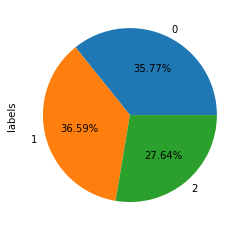

In [26]:
print (data_summary['labels'].value_counts().sort_index())
data_summary['labels'].value_counts().sort_index().plot(kind='pie', autopct='%1.2f%%')

In [27]:
cat_cols =['marital','job','education','loan','campaign']

marital  divorced  married  single   All
labels                                  
0             203     1034     655  1892
1             249     1009     677  1935
2             170      712     580  1462
All           622     2755    1912  5289


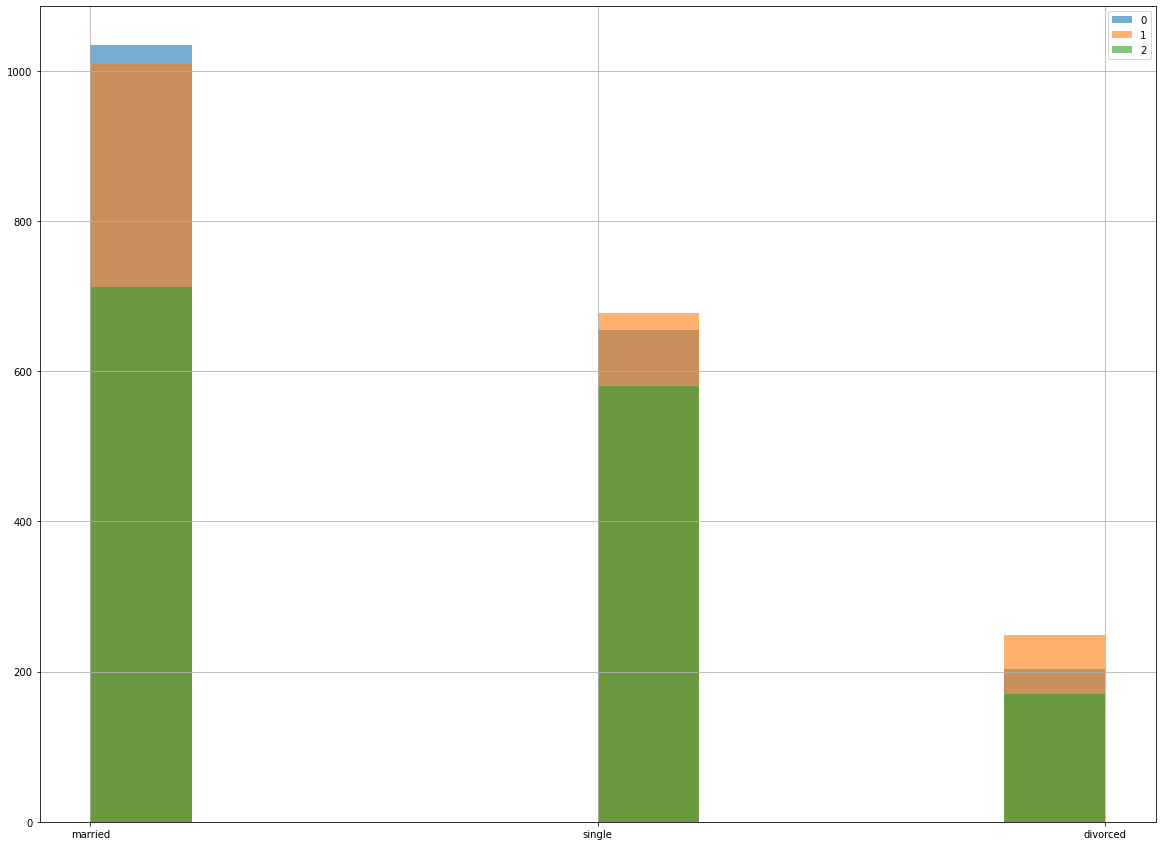

In [28]:
## marital status in each cluster
from final_exam_functions import print_details
print_details('labels', 'marital', data_summary)

job     admin.  blue-collar  entrepreneur  housemaid  management  retired  \
labels                                                                      
0          198          161            41         46         507      259   
1          287          435            53         24         431       52   
2          146          112            29         39         363      205   
All        631          708           123        109        1301      516   

job     self-employed  services  student  technician  unemployed  unknown  \
labels                                                                      
0                  62        99      133         270          97       19   
1                  68       185       22         336          40        2   
2                  57        85      114         234          65       13   
All               187       369      269         840         202       34   

job      All  
labels        
0       1892  
1       1935  
2       1462  

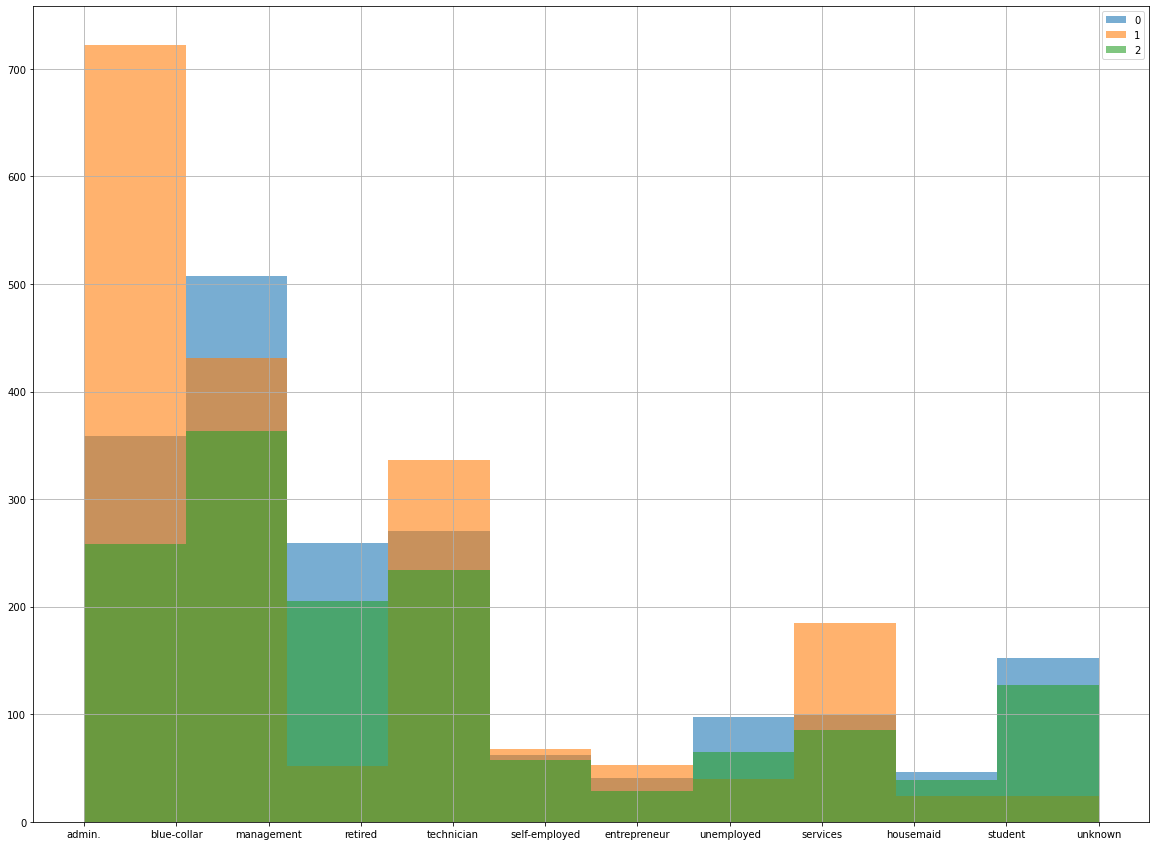

In [29]:
## job status in each cluster  
from final_exam_functions import print_details
print_details('labels', 'job', data_summary)

education  primary  secondary  tertiary  unknown   All
labels                                                
0              212        801       768      111  1892
1              225       1037       614       59  1935
2              154        612       614       82  1462
All            591       2450      1996      252  5289


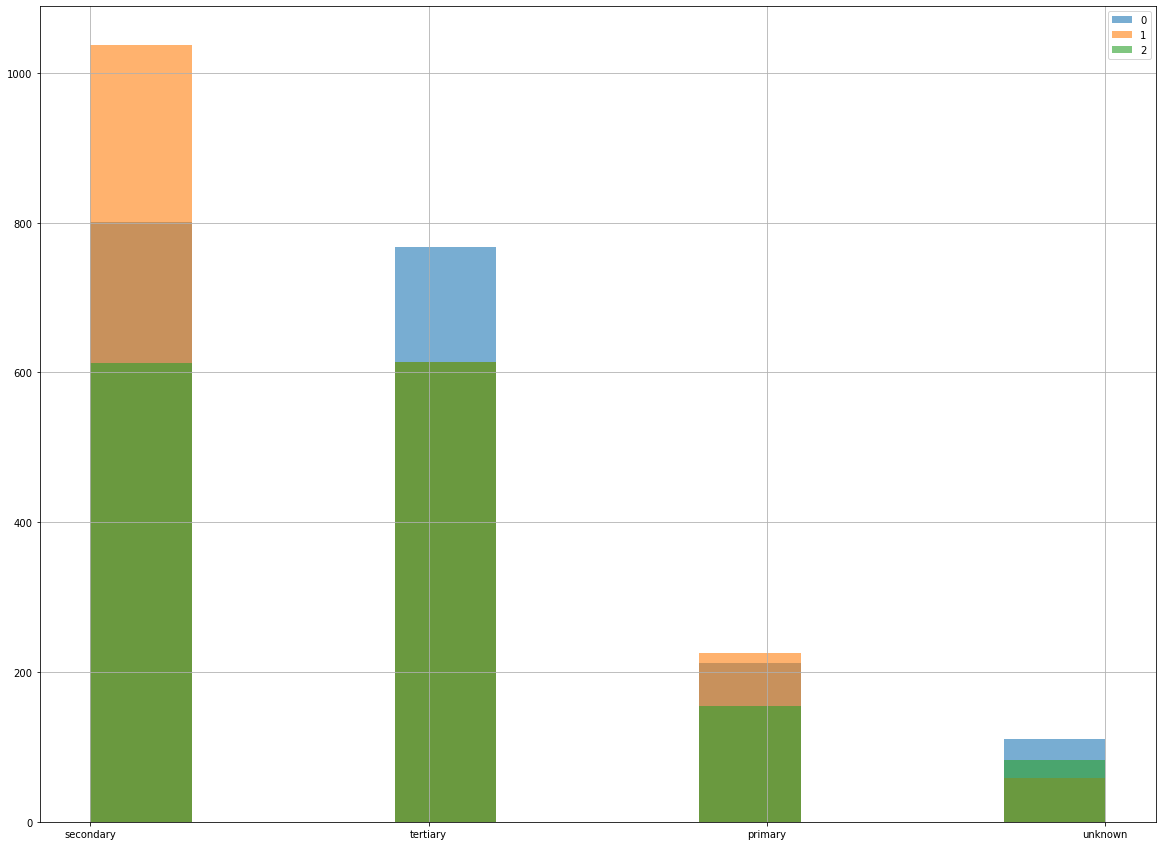

In [30]:
## education status in each cluster  
from final_exam_functions import print_details
print_details('labels', 'education', data_summary)

default    no  yes   All
labels                  
0        1881   11  1892
1        1906   29  1935
2        1450   12  1462
All      5237   52  5289


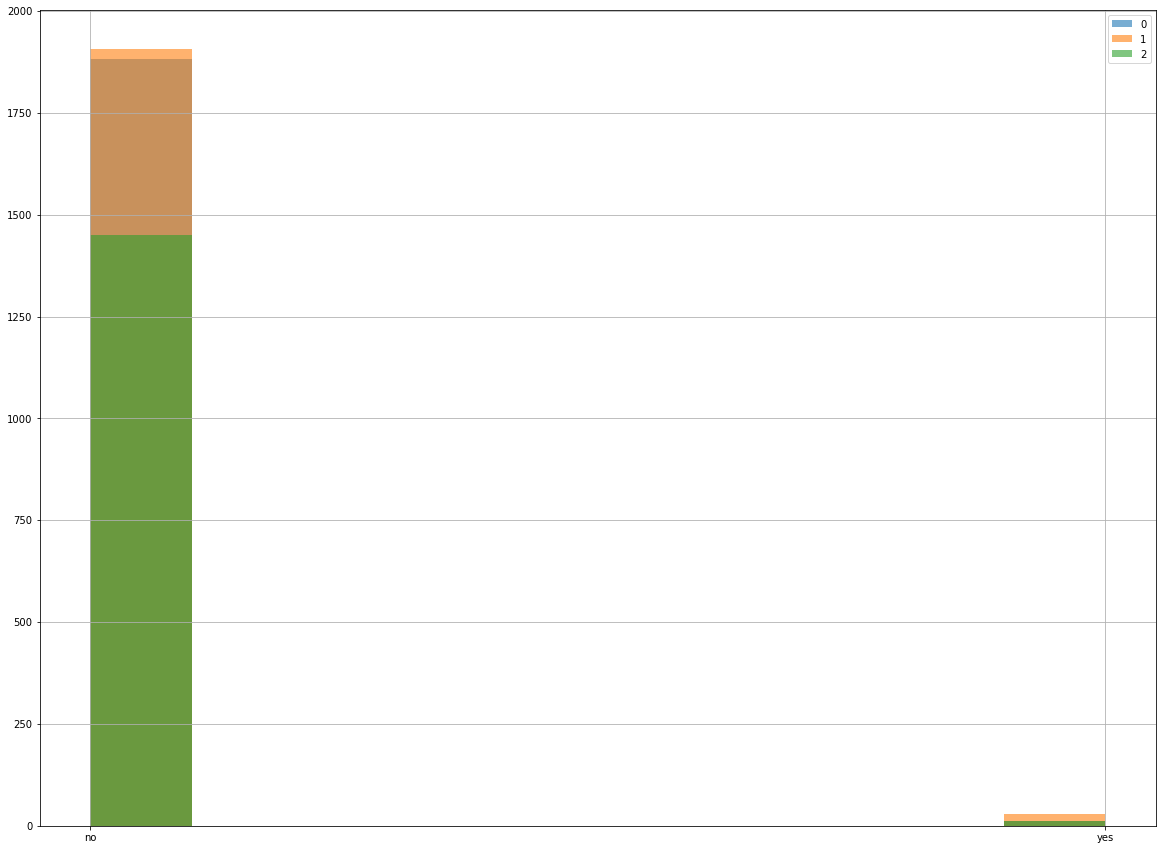

In [31]:
## default status in each cluster  
from final_exam_functions import print_details
print_details('labels', 'default', data_summary)

In [32]:
%load_ext autoreload

loan      no  yes   All
labels                 
0       1778  114  1892
1       1670  265  1935
2       1357  105  1462
All     4805  484  5289


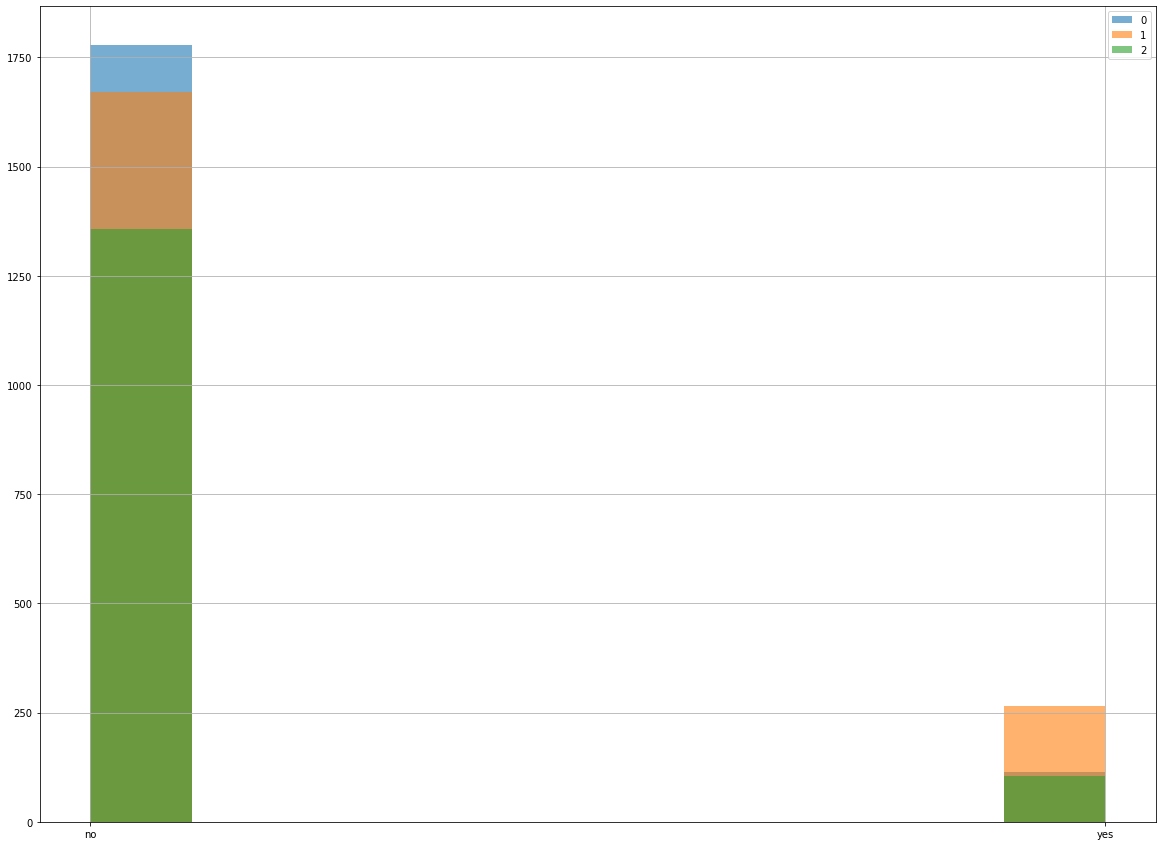

In [33]:
## loan status in each cluster  
from final_exam_functions import print_details
print_details('labels', 'loan', data_summary)

In [34]:
#data_summary.groupby(by=["labels"]).agg({'age':'size', 'impressions':'mean', 'income':'mean','gamer':'size', 'site':'size', 'test':'size'})

In [35]:
data_summary.corr()

,age,balance,day,duration,campaign,labels
age,1.000000,0.122228,0.007198,-0.027995,-0.020674,-0.010396
balance,0.122228,1.000000,0.013673,-0.036677,0.001535,-0.001476
day,0.007198,0.013673,1.000000,0.039467,0.078702,0.704313
duration,-0.027995,-0.036677,0.039467,1.000000,0.160473,0.058321
campaign,-0.020674,0.001535,0.078702,0.160473,1.000000,0.054482
labels,-0.010396,-0.001476,0.704313,0.058321,0.054482,1.000000


In [36]:
data_summary.groupby(by=["labels"]).agg({'age':'mean', 'balance':'mean', 'duration':'mean', 'day':'mean', 'campaign':'mean'})

,age,balance,duration,day,campaign
labels,,,,,
0,43.326638,1987.100951,448.858879,8.533827,1.986786
1,38.734367,1457.914729,660.671835,15.148320,2.216021
2,43.411765,2026.069083,488.447332,23.744186,2.241450


In [37]:
int_cols =['age','balance','duration','day','campaign']

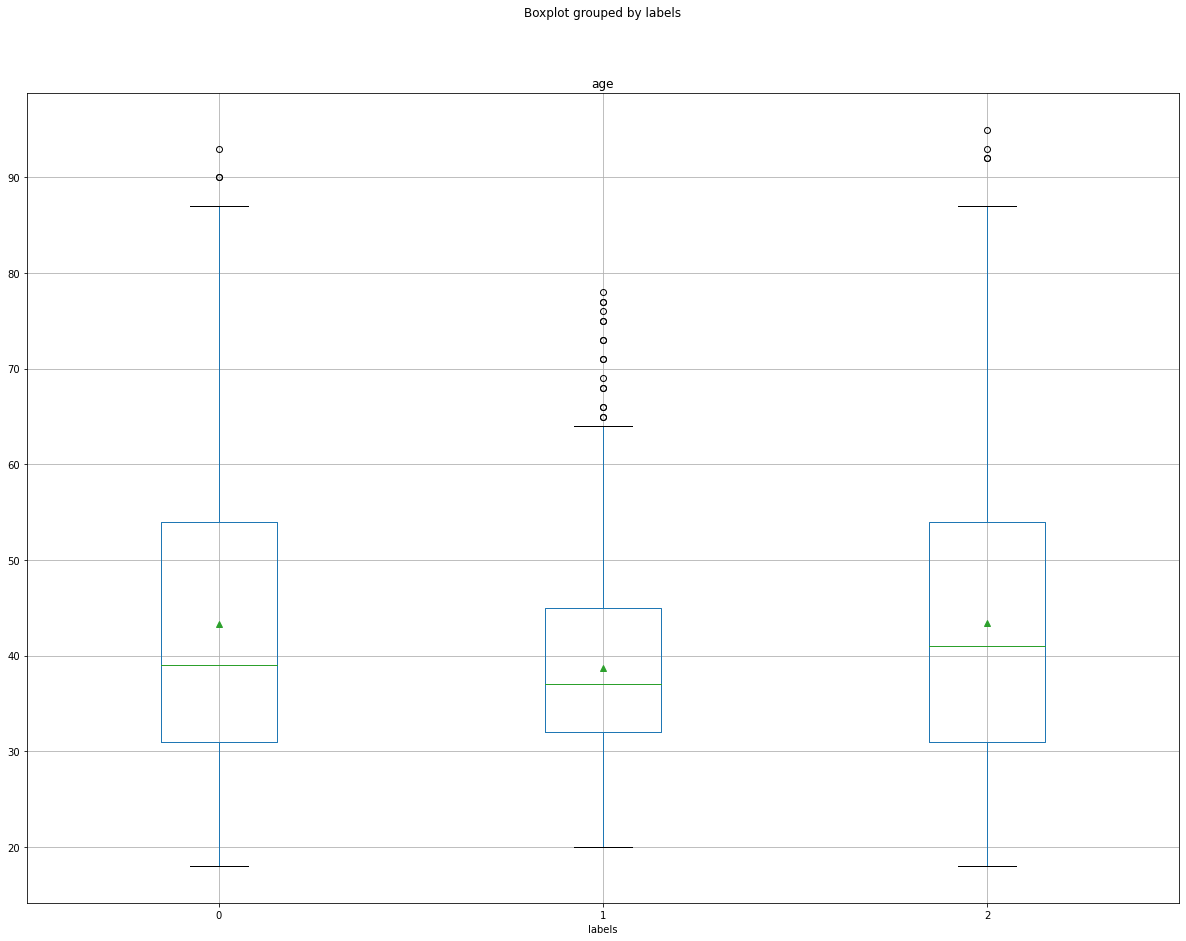

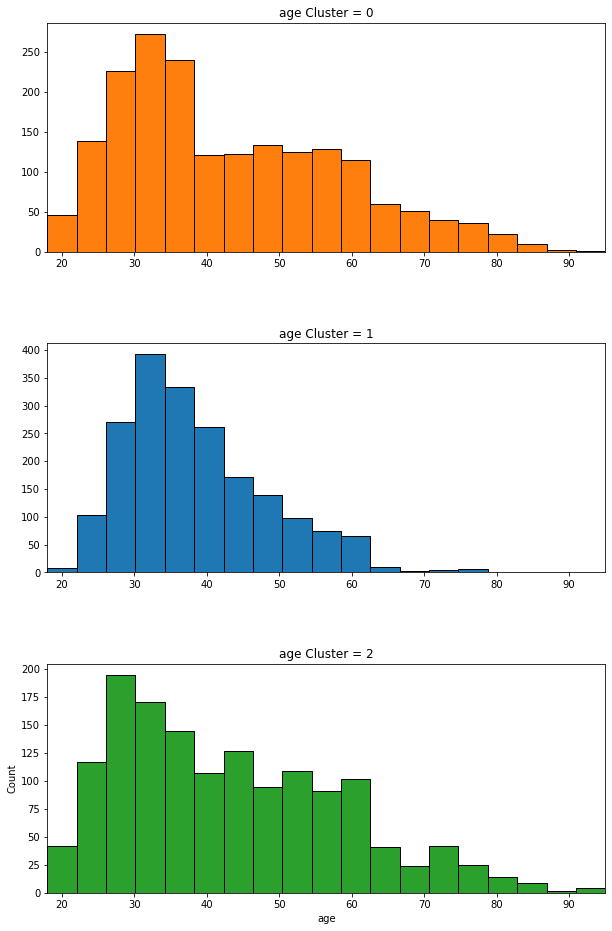

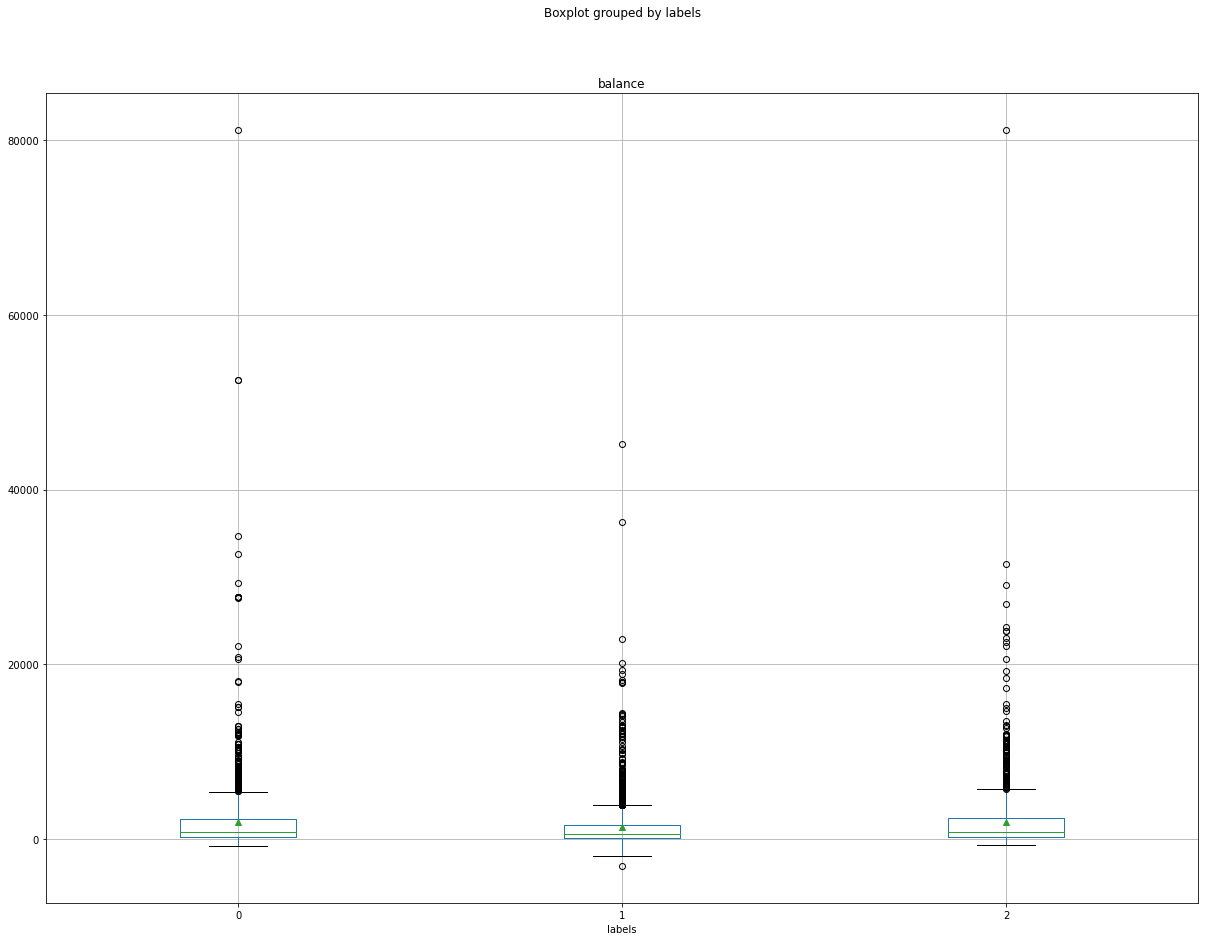

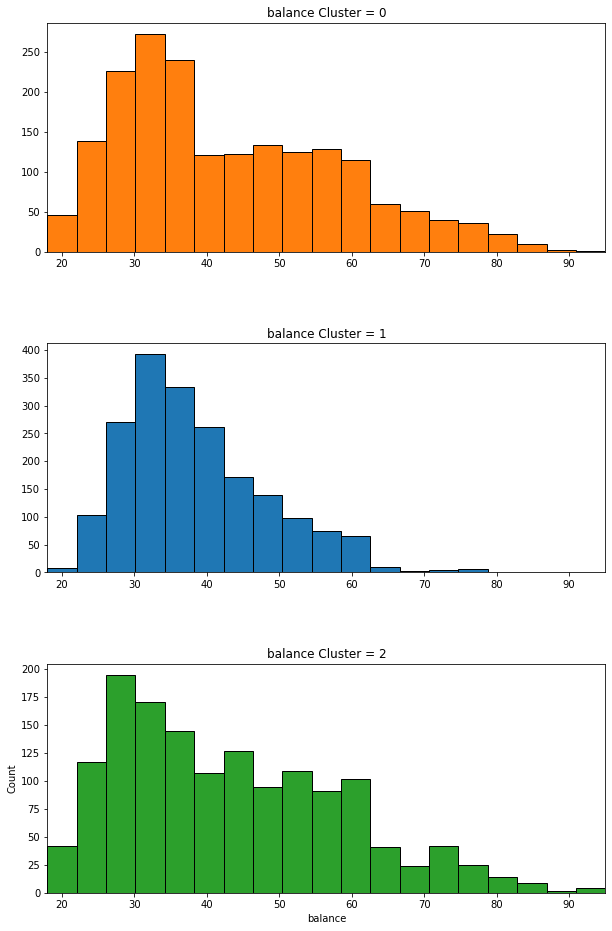

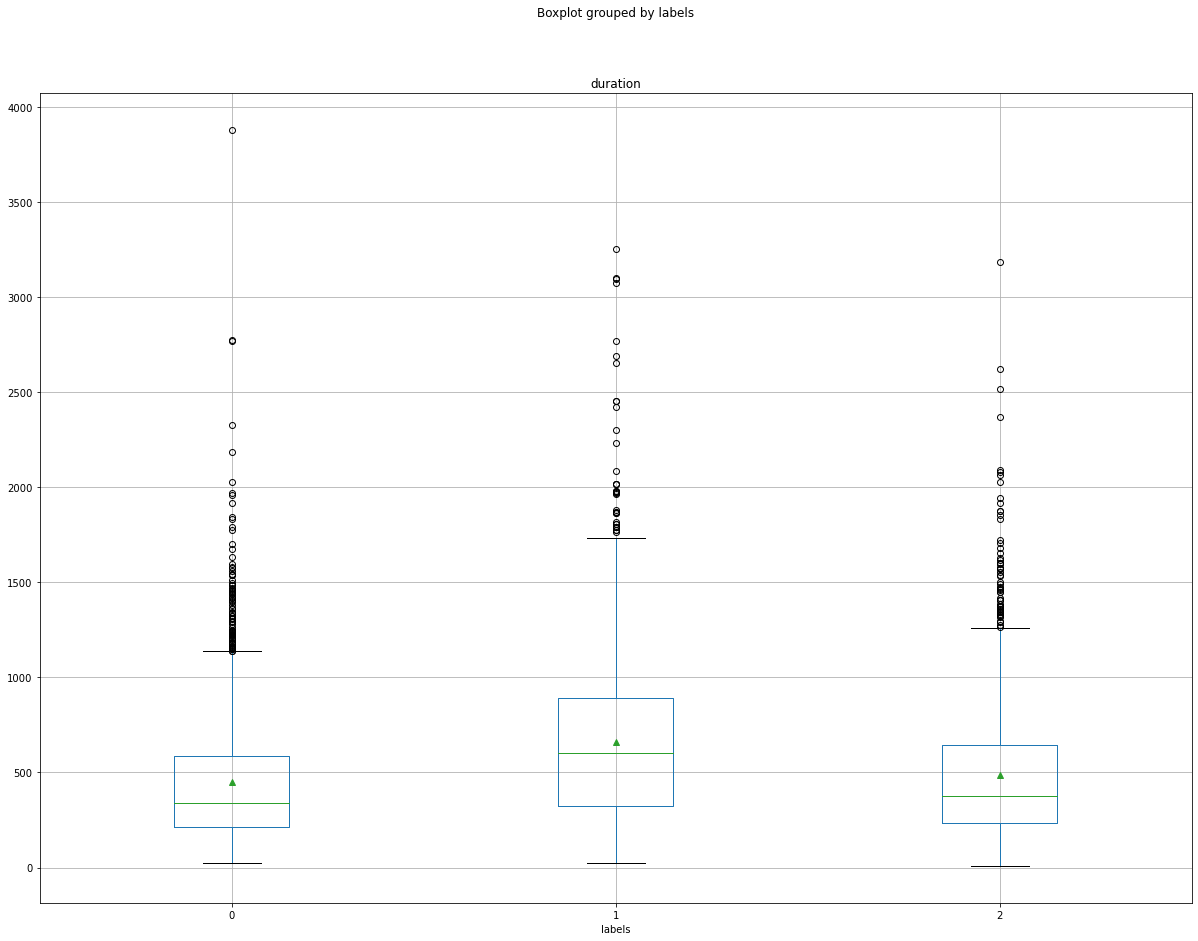

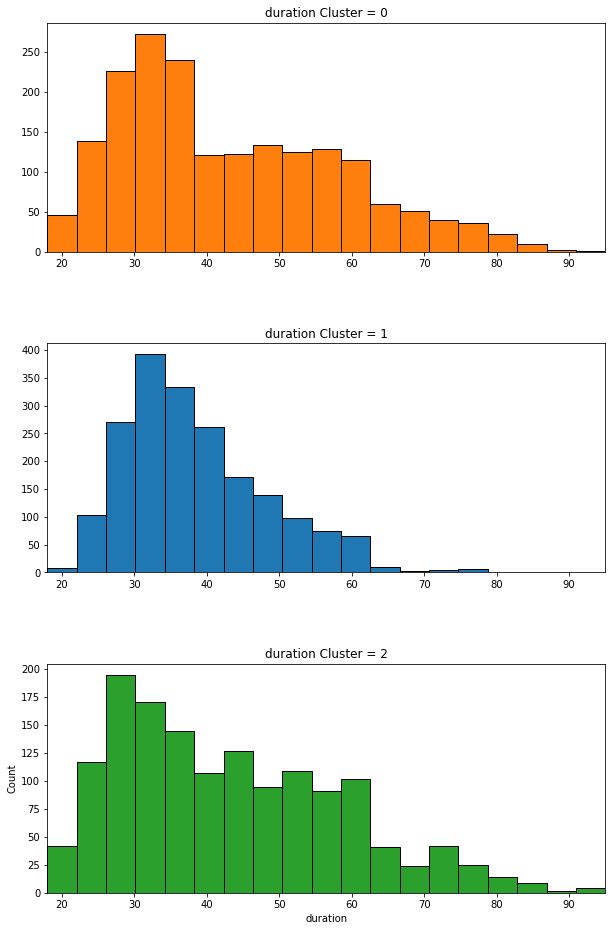

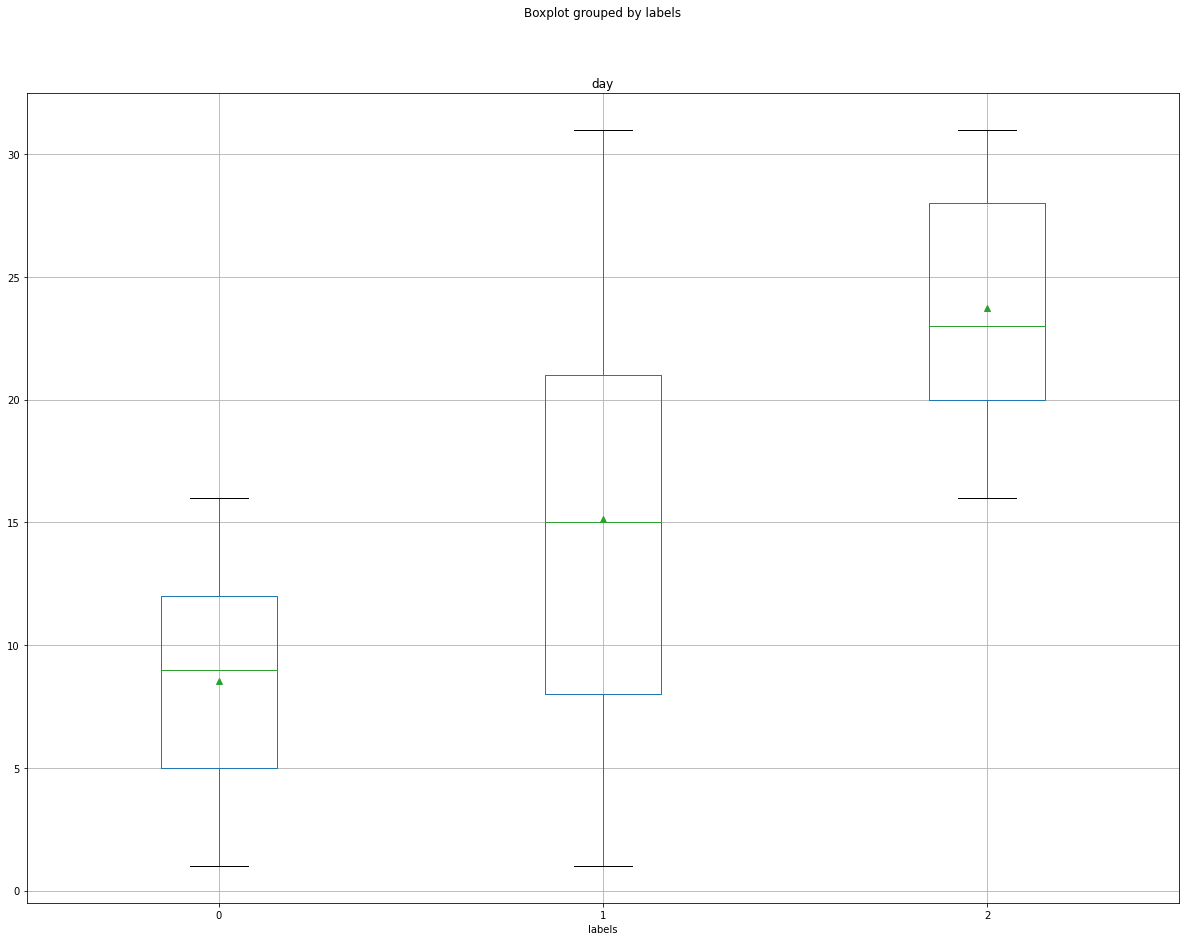

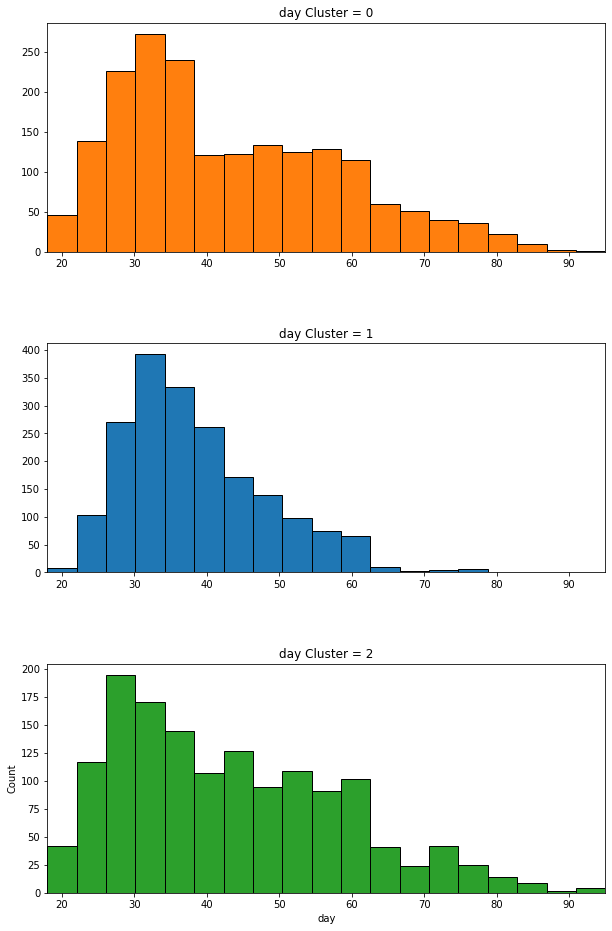

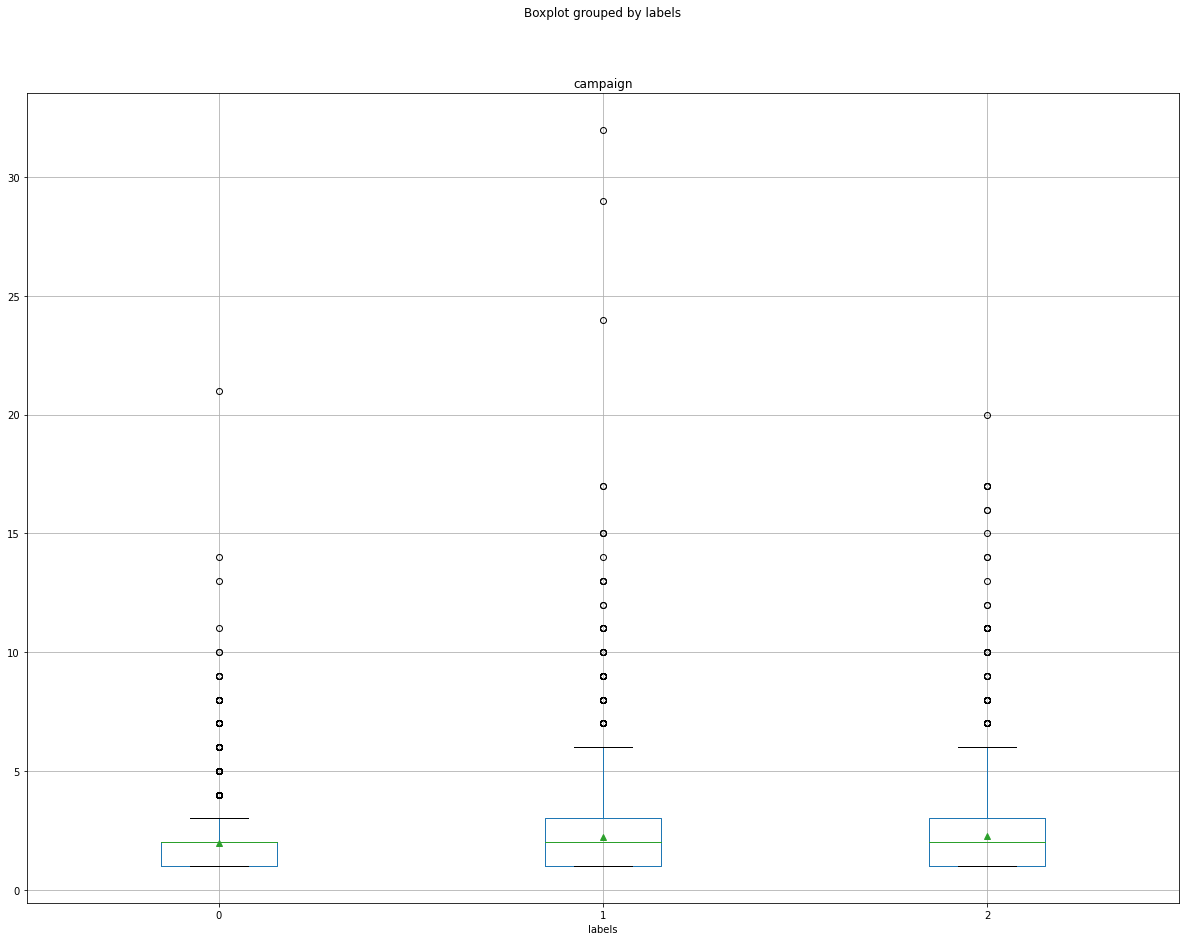

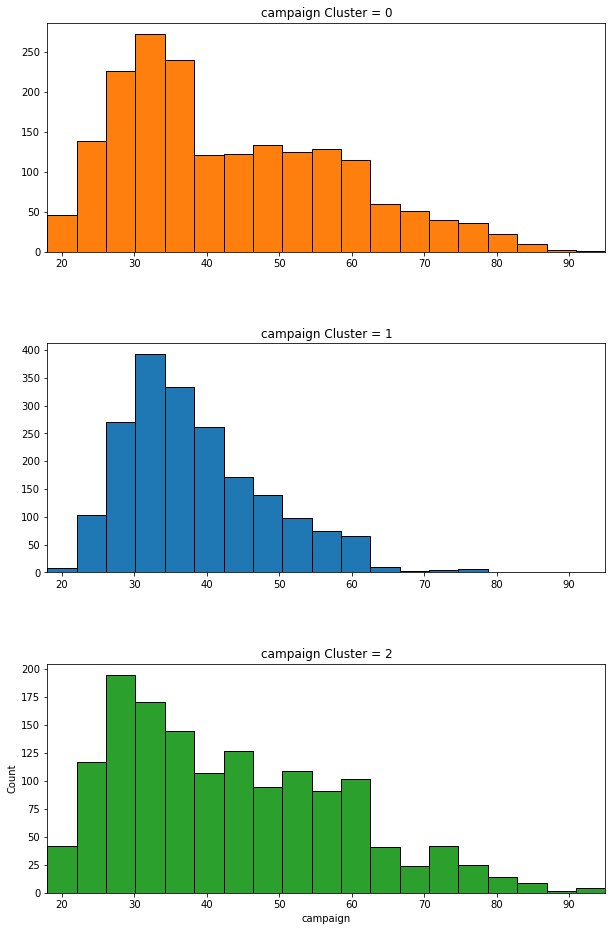

In [38]:
## print
from final_exam_functions import print_num_details
for i in int_cols:
    print_num_details('labels', i, data_summary)

In [39]:
## Comments

In [40]:
data_summary.groupby(by=["labels"]).agg({'age':'std', 'balance':'std', 'duration':'std', 'day':'std', 'campaign':'std'})

,age,balance,duration,day,campaign
labels,,,,,
0,14.967127,3927.724952,343.038503,4.438119,1.504210
1,9.650283,2723.979232,425.842107,8.012801,2.117503
2,15.106198,3784.827304,364.187073,4.531759,2.110851


In [41]:
data_summary.groupby(by=["labels"]).agg({'age':'mean', 'balance':'mean', 'duration':'mean', 'day':'mean', 'campaign':'mean'})

,age,balance,duration,day,campaign
labels,,,,,
0,43.326638,1987.100951,448.858879,8.533827,1.986786
1,38.734367,1457.914729,660.671835,15.148320,2.216021
2,43.411765,2026.069083,488.447332,23.744186,2.241450


## Three clusters are nicely disributed.
0    1892  
1    1935  
2    1462    
Cluster 0 has lowest average age 38.7 and lowest balance and higest call duartion            
Cluster 1 has higest balance and people were called much later in the month.  
Cluster 2: people were called much earlier in the month.